## Import Basic Libraries
EDA libraries, as well as Keras functions

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


### Load and explore Dataset
Context:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content:
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

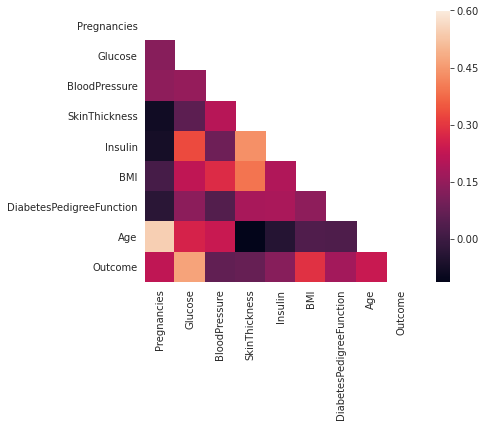

In [5]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(df.corr(), mask=mask, vmax=0.6, square=True)

Plotting Glucose, as it is the most correlated feature with out target variable (Outcome)

C:\Users\niall\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


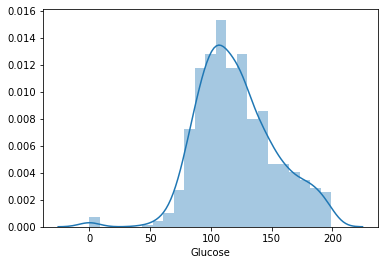

In [6]:
sns.distplot(df['Glucose'])

### Normalize X data

In [7]:
x = df.drop("Outcome",axis=1)

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(x)

### Create Training and Testing Set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = df['Outcome']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

### Create Keras Model

In [12]:
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

W1026 09:21:04.580555  4544 deprecation_wrapper.py:119] From C:\Users\niall\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:68: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1026 09:21:04.610508  4544 deprecation_wrapper.py:119] From C:\Users\niall\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:508: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1026 09:21:04.612498  4544 deprecation_wrapper.py:119] From C:\Users\niall\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3837: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [13]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(0.01), metrics=['accuracy'])

W1026 09:21:04.735311  4544 deprecation_wrapper.py:119] From C:\Users\niall\Anaconda3\lib\site-packages\keras\optimizers.py:757: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1026 09:21:04.742255  4544 deprecation_wrapper.py:119] From C:\Users\niall\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3075: The name tf.log is deprecated. Please use tf.math.log instead.

W1026 09:21:04.753264  4544 deprecation.py:323] From C:\Users\niall\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
model.fit(x_train, y_train, epochs=1000, verbose=1, validation_data=(x_test, y_test))

W1026 09:21:05.161065  4544 deprecation_wrapper.py:119] From C:\Users\niall\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:977: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 537 samples, validate on 231 samples
Epoch 1/1000
537/537 [==============================] - 1s 1ms/step - loss: 0.6807 - acc: 0.6071 - val_loss: 0.6575 - val_acc: 0.6623
Epoch 2/1000
537/537 [==============================] - 0s 80us/step - loss: 0.6572 - acc: 0.6462 - val_loss: 0.6437 - val_acc: 0.6623
Epoch 3/1000
537/537 [==============================] - 0s 65us/step - loss: 0.6485 - acc: 0.6462 - val_loss: 0.6323 - val_acc: 0.6623
Epoch 4/1000
537/537 [==============================] - 0s 69us/step - loss: 0.6290 - acc: 0.6462 - val_loss: 0.6012 - val_acc: 0.6667
Epoch 5/1000
537/537 [==============================] - 0s 57us/step - loss: 0.6064 - acc: 0.6816 - val_loss: 0.5774 - val_acc: 0.6970
Epoch 6/1000
537/537 [==============================] - 0s 58us/step - loss: 0.5855 - acc: 0.7039 - val_loss: 0.5524 - val_acc: 0.7403
Epoch 7/1000
537/537 [==============================] - 0s 56us/step - loss: 0.5695 - acc: 0.6872 - val_loss: 0.5425 - val_acc: 0.7792
Epoch 8/10

In [15]:
validation = model.evaluate(x_test,y_test)

231/231 [==============================] - 0s 52us/step


In [16]:
validation

[0.5909466628646438, 0.7792207792207793]

### Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [18]:
GB_classifier = GradientBoostingClassifier(learning_rate=0.001)
GB_classifier.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [19]:
y_predictions = GB_classifier.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
print("Accuracy: ", accuracy_score(y_test, y_predictions))

Accuracy:  0.6623376623376623


### Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dTree_clf = DecisionTreeClassifier()

In [24]:
dTree_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
y_predictions2 = dTree_clf.predict(x_test)

In [26]:
print("Accuracy: ", accuracy_score(y_test, y_predictions2))

Accuracy:  0.7316017316017316


### XGB

In [27]:
xgb_classifier = xgb.XGBClassifier()

In [28]:
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [29]:
y_predictions3 = xgb_classifier.predict(x_test)

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [30]:
print("Accuracy: ", accuracy_score(y_test, y_predictions3))

Accuracy:  0.7662337662337663


### Adaptive Boosting

In [31]:
model4 = DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [32]:
AdaBoost = AdaBoostClassifier(base_estimator=model4, n_estimators=400, learning_rate=1)

In [33]:
boostmodel4 = AdaBoost.fit(x_train, y_train)

In [34]:
y_predictions4 = boostmodel4.predict(x_test)

In [35]:
y_predictions4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [36]:
print("Accuracy: ", accuracy_score(y_test, y_predictions4))

Accuracy:  0.7186147186147186


### Parameter Search

In [37]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.cross_validation import StratifiedKFold
import random

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\grid_search.py:14: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, Sized
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [38]:
cv = StratifiedKFold(y_train, n_folds=10, shuffle=True)

In [39]:
param_grid = {
    'max_depth': [1,2,3],
    'n_estimators': [5,10,25,50],
    'learning_rate': np.linspace(1e-16,1,3)
}

In [40]:
params_fixed = {
    'objective': 'binary:logistic',
    'silent': 1
}

In [41]:
best_grid = GridSearchCV(
    verbose=2,
    estimator=xgb.XGBClassifier(),
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy'
)

In [42]:
best_grid.fit(x_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] learning_rate=1e-16, max_depth=1, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=5 ................
[CV] ....... l

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: Deprecatio


[CV] learning_rate=1e-16, max_depth=1, n_estimators=10 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=10 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=10 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=10 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=25 -   0.0s
[CV] 

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i


[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=50 ...............
[CV] 

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=1, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=5 ................


C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ....... learning_rate=1e-16, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=10 ...............
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i


[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=10 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=25 ...............
[CV] 

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=50 ...............


C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=2, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=5 ................
[CV] ....... learning_rate=1e-16, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=5 ................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ....... learning_rate=1e-16, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=10 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=10 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=10 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=10 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=10 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=10 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=10 ...............
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i


[CV] learning_rate=1e-16, max_depth=3, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=25 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=25 -   0.0s
[CV] 

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=50 ...............


C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1e-16, max_depth=3, n_estimators=50 ...............
[CV] ...... learning_rate=1e-16, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=5 ..................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i


[CV] learning_rate=0.5, max_depth=1, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=10 -   0.0s
[CV] 

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=50 .................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i


[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=5 ..................


C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ......... learning_rate=0.5, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=5 ..................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=25 .................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=50 .................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=50 .................


C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=5 ..................
[CV] ......... learning_rate=0.5, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=5 ..................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i


[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=10 -   0.0s
[CV] 

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=25 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=25 .................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................


C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................


C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=0.5, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=1, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=5 ..................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=25 .................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=50 .................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=50 .................

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i


[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=1, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=1, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=5 ..................
[CV] 

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ......... learning_rate=1.0, max_depth=2, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=10 .................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=25 .................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=50 .................


C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=2, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=2, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=5 ..................

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i


[CV] ......... learning_rate=1.0, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=5 ..................
[CV] ......... learning_rate=1.0, max_depth=3, n_estimators=5 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=5 ..................
[CV] 

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=10 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=10 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=25 .................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=25 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=25 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=25 .................
[CV] .

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=50 .................


C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=50 -   0.0s
[CV] learning_rate=1.0, max_depth=3, n_estimators=50 .................
[CV] ........ learning_rate=1.0, max_depth=3, n_estimators=50 -   0.0s


C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    7.2s finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 1 ... 0 0], n_folds=10, shuffle=True, random_state=None),
       error_score='raise',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3], 'n_estimators': [5, 10, 25, 50], 'learning_rate': array([1.e-16, 5.e-01, 1.e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=2)

In [43]:
best_grid.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 5}

### SVM

In [44]:
from sklearn import svm

In [45]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
y_predictions6 = svm_clf.predict(x_test)

In [47]:
print("Accuracy: ", accuracy_score(y_test, y_predictions6))

Accuracy:  0.8051948051948052


### Voting Estimator

In [48]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [84]:
DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=1)

# c1 = AdaBoostClassifier(base_estimator=DT_model, n_estimators=400, learning_rate=1)
c2 = xgb.XGBClassifier(learning_rate=0.5, max_depth=3, n_estimators=5)
c3 = MLPClassifier(hidden_layer_sizes=(10,))
c4 = svm.SVC(kernel='linear')

In [93]:
vc = VotingClassifier(estimators=[('XGB', c2), ('NN', c3), ('SVM', c4)], voting='hard')

In [94]:
vc = vc.fit(x_train, y_train)

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [97]:
y_predictions5 = vc.predict(x_test)

C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [98]:
print("Accuracy: ", accuracy_score(y_test, y_predictions5))

Accuracy:  0.8095238095238095
